In [1]:
from IPython.display import HTML
from rdkit import Chem
from rdkit.Chem import PandasTools 
PandasTools.RenderImagesInAllDataFrames(images=True)  
import pandas as pd 
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None) 
display(HTML("<style>.container { width:100% !important; }</style>"))  
import math
show = lambda df, n=5: display(HTML(df.head(n).to_html()))
df = pd.read_pickle('df_final.2021-02-09T00_48_43.906818.pkl')    
df = df[(df['binder_id'].notna()) & (df['warhead_name'].notna()) ]

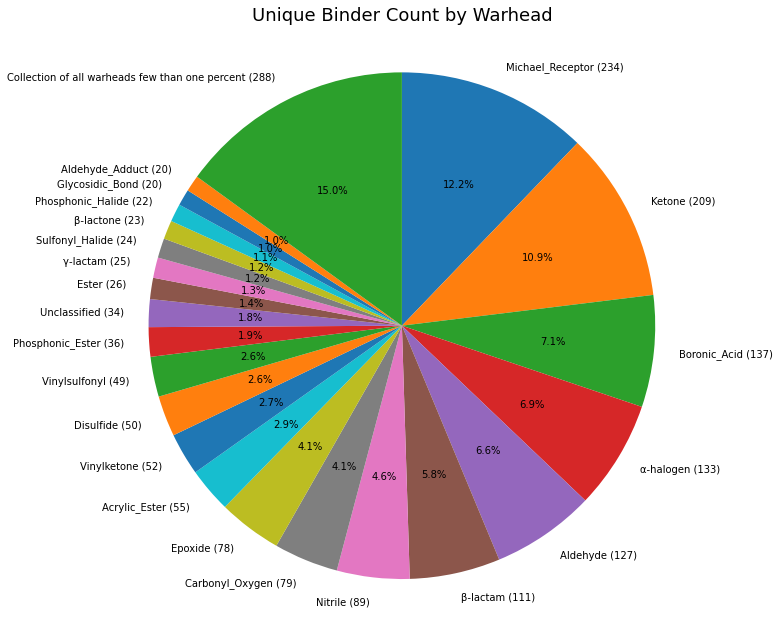

In [2]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(10,11)) 
ax1.set_title("Unique Binder Count by Warhead", fontdict={'fontsize': 18, 'fontweight' : 10})
total_dict = df.drop_duplicates(['binder_id','warhead_name'])['warhead_name'].value_counts().to_dict()
total_num = sum(total_dict.values())
draw_dict = {i:j for i,j in total_dict.items() if j/total_num>=0.01}
draw_dict.update({'Collection of all warheads few than one percent':total_num-sum(draw_dict.values())})
ax1.pie(draw_dict.values(),  labels=[f'{i} ({j})' for i, j in draw_dict.items()], autopct='%1.1f%%', pctdistance=0.6, startangle=90, radius=2.,counterclock=False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

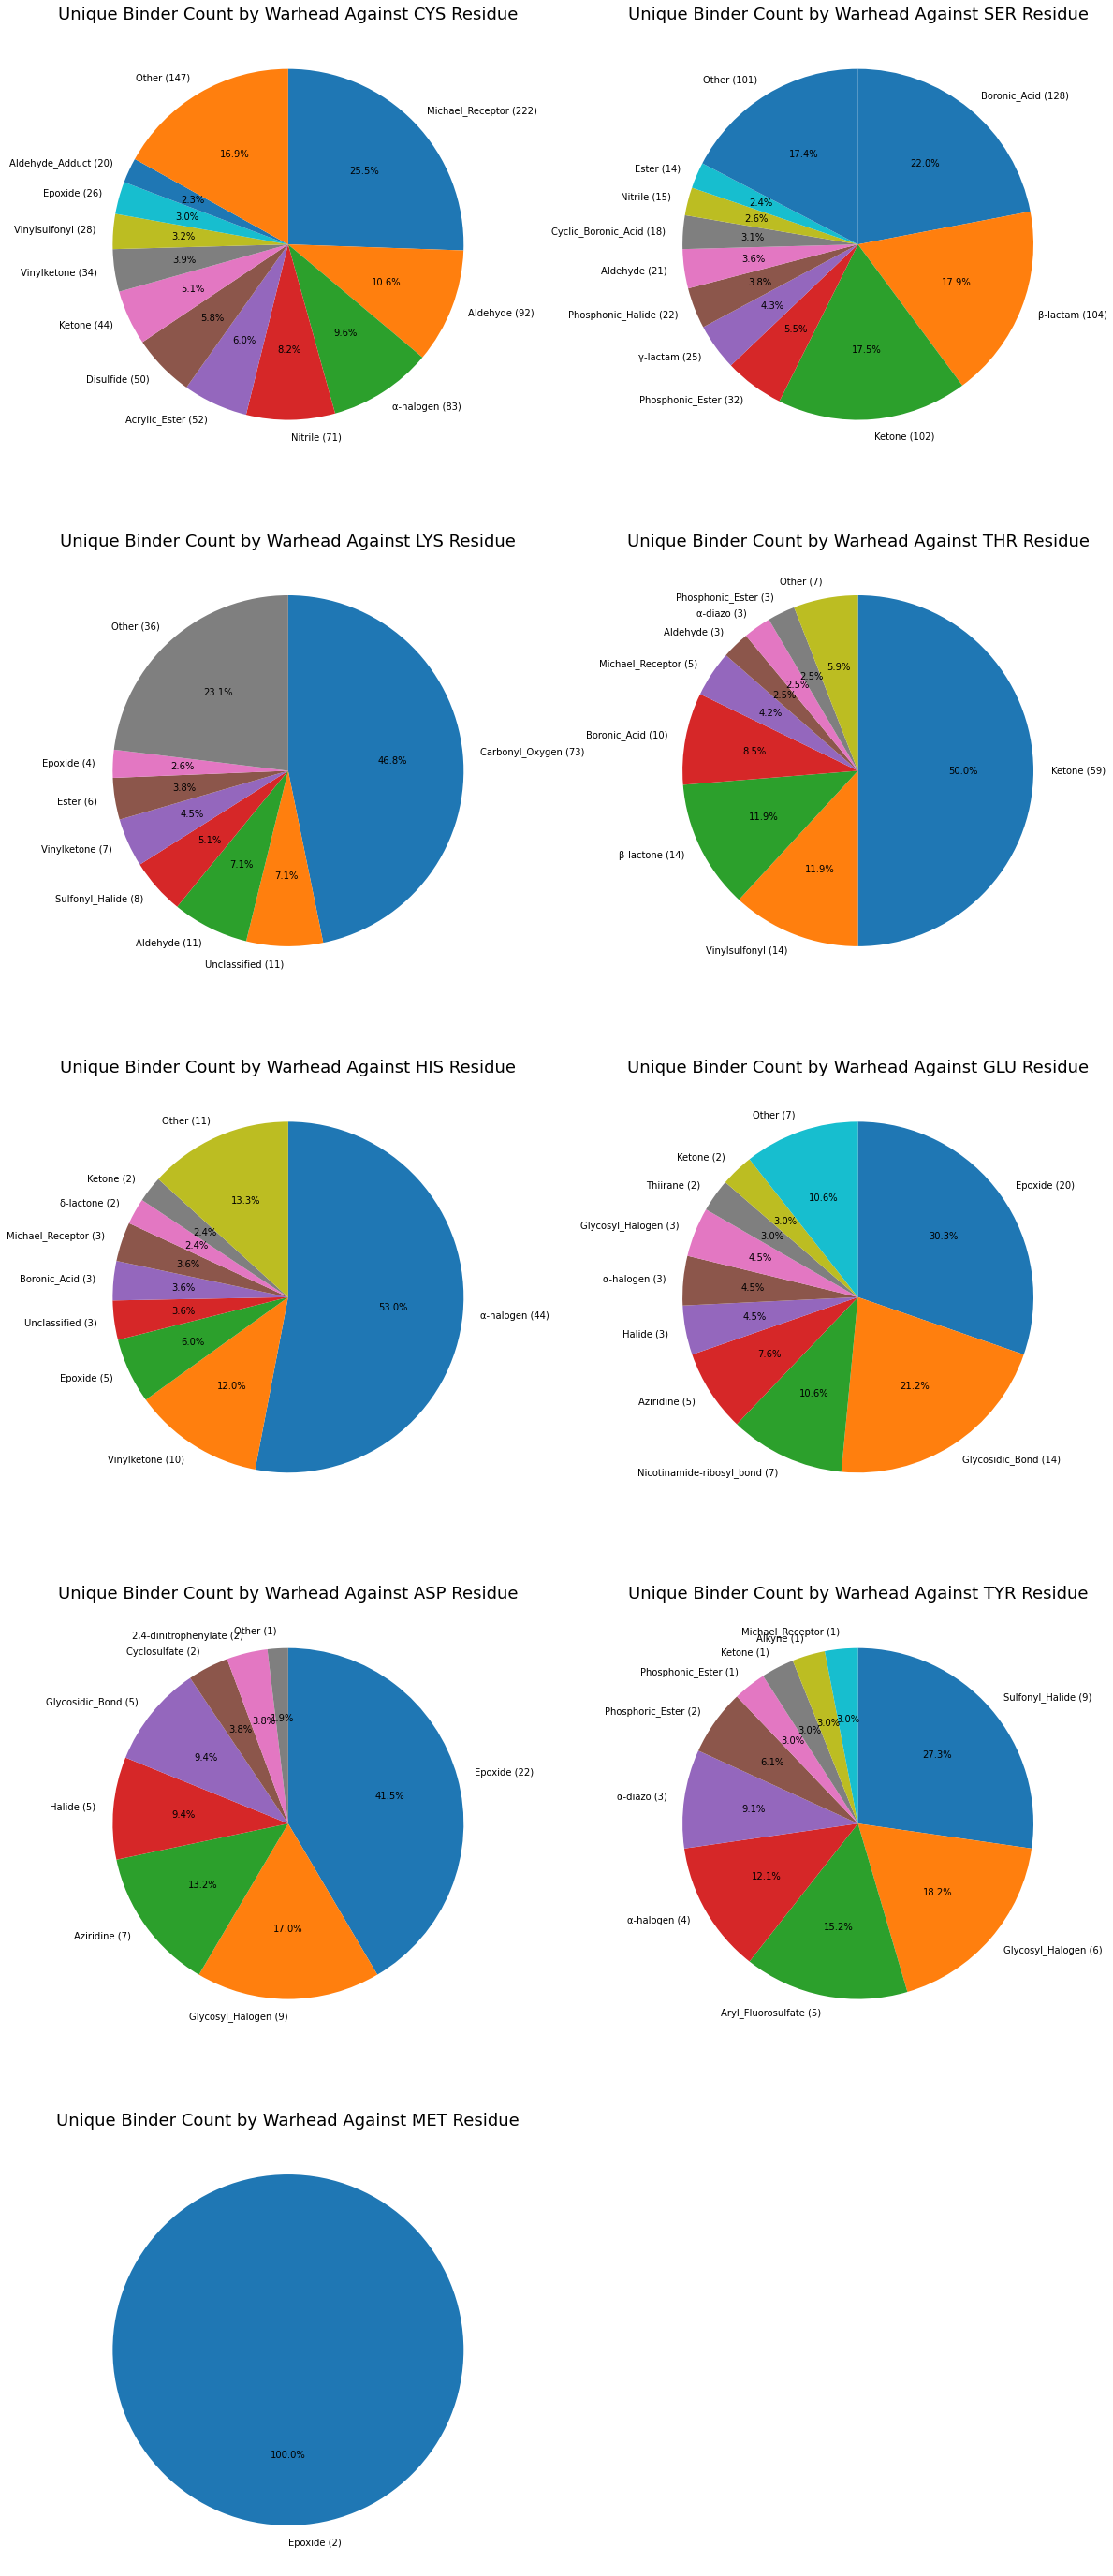

In [3]:
fig, axs = plt.subplots(5, 2,figsize=(20,50))
#fig1.set_figheight(10) 
#fig1.set_figwidth(10)  

res_df = df.drop_duplicates(['binder_id','warhead_name','res_name']).copy()
res_list = list(res_df['res_name'].value_counts().keys())
for k, res_name in enumerate(res_list): 
    x, y = k // 2, k % 2
    ax = axs[x, y]
    total_dict = res_df[res_df['res_name']==res_name]['warhead_name'].value_counts().to_dict()  
    total_num = sum(total_dict.values())
    draw_dict = {i:j for i,j in total_dict.items() if j/total_num>=0.02}
    if total_num > sum(draw_dict.values()): 
        draw_dict.update({'Other':total_num-sum(draw_dict.values())})
    ax.pie(draw_dict.values(),  labels=[f'{i} ({j})' for i, j in draw_dict.items()], autopct='%1.1f%%', pctdistance=0.6, startangle=90, radius=1.,counterclock=False ) 
    ax.set_title(f"Unique Binder Count by Warhead Against {res_name} Residue", fontdict={'fontsize': 18, 'fontweight' : 10})  
plt.axis('off')
plt.show()  

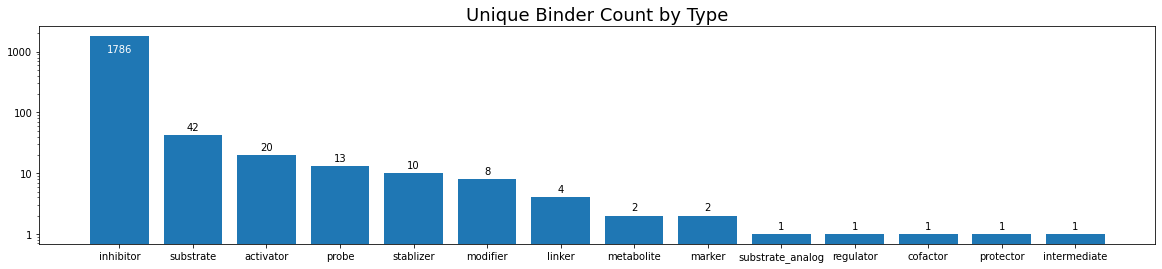

In [4]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(20,4)) 
ax1.set_title("Unique Binder Count by Type", fontdict={'fontsize': 18, 'fontweight' : 10}) 
#once = [i for i, j in df.drop_duplicates(['binder_id','binder_type'])['binder_type'].value_counts().to_dict().items() if j==1] 
draw_dict = df.drop_duplicates(['binder_id','binder_type'])['binder_type'].value_counts().to_dict() 
k, v = list(draw_dict.keys()), list(draw_dict.values())
rect = ax1.bar(x=k, height=v, width=0.8, align='center', log=True) 

from matplotlib.ticker import ScalarFormatter
ax1.yaxis.set_major_formatter(ScalarFormatter()) 

for i, r in enumerate(rect): 
    height = r.get_height()
    if i:
        ax1.annotate('{}'.format(height), xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom') 
    else:
        ax1.annotate('{}'.format(height), xy=(r.get_x() + r.get_width() / 2, 800), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='white') 

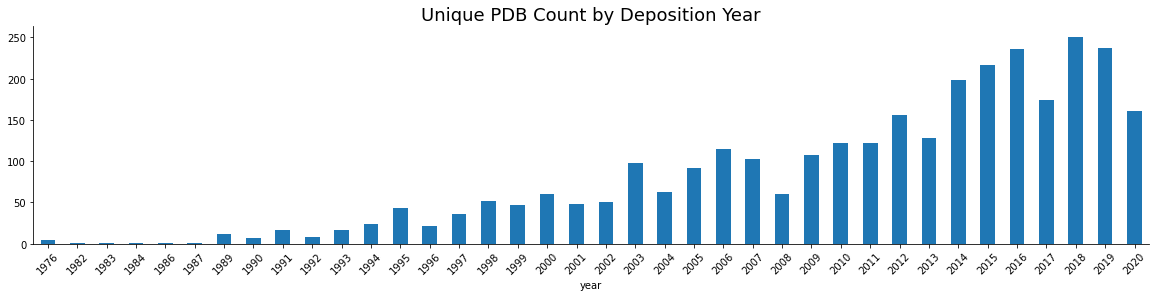

In [5]:
'''
with open('pdb.log', 'w') as fw: [print(f'grep -H _pdbx_database_status.recvd_initial_deposition_date {rcsb_cif_dir}/{pdbid.lower()[1:3]}/{pdbid.lower()}.cif >> r.log', file=fw) for pdbid in df['pdb_id'].unique()]
with open('r.log', 'r') as fr: date = {i[34:38]: i[97:107] for i in fr.readlines()}
import json
with open('deposition_date.json', 'w') as fw: json.dump(date, fw)
'''
import json
with open('deposition_date.json', 'r') as fr: date = json.load(fr) 
df = pd.DataFrame([{'pdb_id':i, 'year':pd.Timestamp(j)} for i,j in date.items()])  
ax = df[['year']].groupby(df["year"].dt.year).count().plot(kind="bar")
ax.set_title(f"Unique PDB Count by Deposition Year", fontdict={'fontsize': 18, 'fontweight' : 10}) 
ax.xaxis.set_tick_params(labelrotation=45) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.get_legend().remove()
fig = ax.get_figure() 
fig.set_figwidth(20)